# TH BUỔI 1

In [81]:
import pandas as pd 
import numpy as np

## Reading the file 

In [82]:
df = pd.read_csv('D:/NguyenTienDat_23520262/Nam 2,5/Hoc may thong ke/forest+fires/forestfires.csv')

print(df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


## Preprocess


In [83]:
for column_name in df.columns:
    nums_null = df[column_name].isnull().sum()
    nums_NaN = df[column_name].isna().sum()
    print(f"{column_name}: \n nums_null: {nums_null} \n nums_NaN: {nums_NaN}")

X: 
 nums_null: 0 
 nums_NaN: 0
Y: 
 nums_null: 0 
 nums_NaN: 0
month: 
 nums_null: 0 
 nums_NaN: 0
day: 
 nums_null: 0 
 nums_NaN: 0
FFMC: 
 nums_null: 0 
 nums_NaN: 0
DMC: 
 nums_null: 0 
 nums_NaN: 0
DC: 
 nums_null: 0 
 nums_NaN: 0
ISI: 
 nums_null: 0 
 nums_NaN: 0
temp: 
 nums_null: 0 
 nums_NaN: 0
RH: 
 nums_null: 0 
 nums_NaN: 0
wind: 
 nums_null: 0 
 nums_NaN: 0
rain: 
 nums_null: 0 
 nums_NaN: 0
area: 
 nums_null: 0 
 nums_NaN: 0


In [84]:
def convert_day(day: str) -> int:
    day_dict = {
        "sun": 0,
        "mon": 1,
        "tue": 2,
        "wed": 3,
        "thu": 4,
        "fri": 5,
        "sat": 6
    } 
    return day_dict[day]

In [85]:
def convert_month(month: str) -> int:
    month_dict = {
        "jan": 1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12
    } 
    return month_dict[month]

In [86]:
df['day'] = df['day'].apply(convert_day)
df['month'] = df['month'].apply(convert_month)

In [87]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [88]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,2.972921,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.143867,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Modeling


In [89]:
class LinearRegression: 
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        cov = X.T @ X
        inv_cov = np.linalg.inv(cov)
        self.theta_ = inv_cov @ (X.T @ y)

    def rmse(self, y: np.ndarray, y_pred: np.ndarray) -> float:
        delta = y - y_pred
        return np.square(delta).mean()**0.5
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        return self.theta_ @ X.T

## Defining the input and output vectors

In [90]:
X_y = df.to_numpy()
print(X_y)

[[ 7.    5.    3.   ...  6.7   0.    0.  ]
 [ 7.    4.   10.   ...  0.9   0.    0.  ]
 [ 7.    4.   10.   ...  1.3   0.    0.  ]
 ...
 [ 7.    4.    8.   ...  6.7   0.   11.16]
 [ 1.    4.    8.   ...  4.    0.    0.  ]
 [ 6.    3.   11.   ...  4.5   0.    0.  ]]


In [91]:
X_y.shape

(517, 13)

In [92]:
N = df.shape[0]
X_y_train, X_y_test = np.split(X_y, indices_or_sections=[int(0.8 * N)])

In [93]:
X_train, X_test = X_y_train[:,:-1], X_y_test[:,:-1]

In [94]:
y_train, y_test = X_y_train[:,-1], X_y_test[:,-1]

In [95]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [96]:
y_pred = lr.predict(X_test)
print(y_pred)

[ 35.83533448  18.77638492  29.15051446  20.42772457   4.30399383
  17.69543078  17.71290125  28.34795941  21.46622746  30.34473004
  12.76723564  37.00774935  24.87155093  29.08571618  22.32713839
  21.84437275  17.44227541  35.0070586   24.27524945  25.63808205
  11.681678    29.4793817   18.8738875   26.34457096  24.03122918
  26.29371288  10.84703558  30.62393583  26.8939575    1.64350708
  -1.45793103  27.4750408    5.14389708  13.26190352  -2.21590458
  20.51549937  15.77832857  14.28515218   3.56352927  19.41605223
  26.27342985  23.56957868   2.90928601  21.98031997  17.84493084
  27.51194135  27.30368975  22.25596369  27.51194135  14.01154413
  -7.51184614  -6.07146741   0.18369402  -2.00320492  -0.06652443
   6.50546421  -0.80442664   0.56060002  15.01441359  11.0598342
  20.74347409  18.31221533   8.21743226  19.23044168   5.76883827
  -1.99757329  14.04169697  22.94376997  20.92546365   6.4575592
  16.13438078  12.10297283   6.43368262   9.04648161  11.57969837
   0.9827252

In [97]:
rmse = lr.rmse(y_test, y_pred)
print(rmse)

79.42477263962971


In [98]:
lr.theta_

array([ 0.93387474, -0.3472708 ,  2.97274599,  1.69617548, -0.08518378,
        0.11686352, -0.02830015, -0.88678297,  0.43970684, -0.18297875,
        0.04626583, -6.54744483])

## Bài 2: Chuẩn hoá dữ liệu về phân phối có kỳ vọng là 0 và phương sai là 1 So sánh kết quả của mô hình sau khi được huấn luyện với dữ liệu đã được chuẩn hoá so với kết quả trong bài 1.Không chuẩn hóa khi nó số rời rạc, categorical 

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [100]:
for column_name in df.columns:
    if column_name not in ['X', 'Y', 'month', 'day', 'RH']:
        df[column_name] = df[column_name] - df[column_name].mean() / df[column_name].std()
    

In [101]:
X_y = df.to_numpy()

In [102]:
X_y_train, X_y_test = np.split(X_y, indices_or_sections=[int(0.8 * N)])

In [103]:
X_train, X_test = X_y_train[:,:-1], X_y_test[:,:-1]

In [104]:
Y_train, Y_test = X_y_train[:,-1], X_y_test[:,-1]

In [105]:
lr1 = LinearRegression()

lr1.fit(X_train, y_train)

In [106]:
rmse1 = lr1.rmse(y_test, y_pred)
print(f"rmse1: {rmse1} \n rmse: {rmse}")

rmse1: 79.42477263962971 
 rmse: 79.42477263962971


In [107]:
print(f"theta1: {lr1.theta_} \n\n theta: {lr.theta_}")

theta1: [ 0.93472213 -0.36823678  2.94555659  1.69131429 -0.1039753   0.11735493
 -0.02802442 -0.87694662  0.42693142 -0.18912012  0.04239555 -5.74172683] 

 theta: [ 0.93387474 -0.3472708   2.97274599  1.69617548 -0.08518378  0.11686352
 -0.02830015 -0.88678297  0.43970684 -0.18297875  0.04626583 -6.54744483]


## Bài 3: Tiến hành kỹ thuật Feature Engineering, tìm ra các thuộc tính có tính  chất colinearity (linearly dependent). Huấn luyện lại phương pháp hồi quy tuyến tính  với bộ dữ liệu chỉ giữ lại các thuộc tính uncorrelated. 

In [108]:
from matplotlib import pyplot as plt
import seaborn as sns

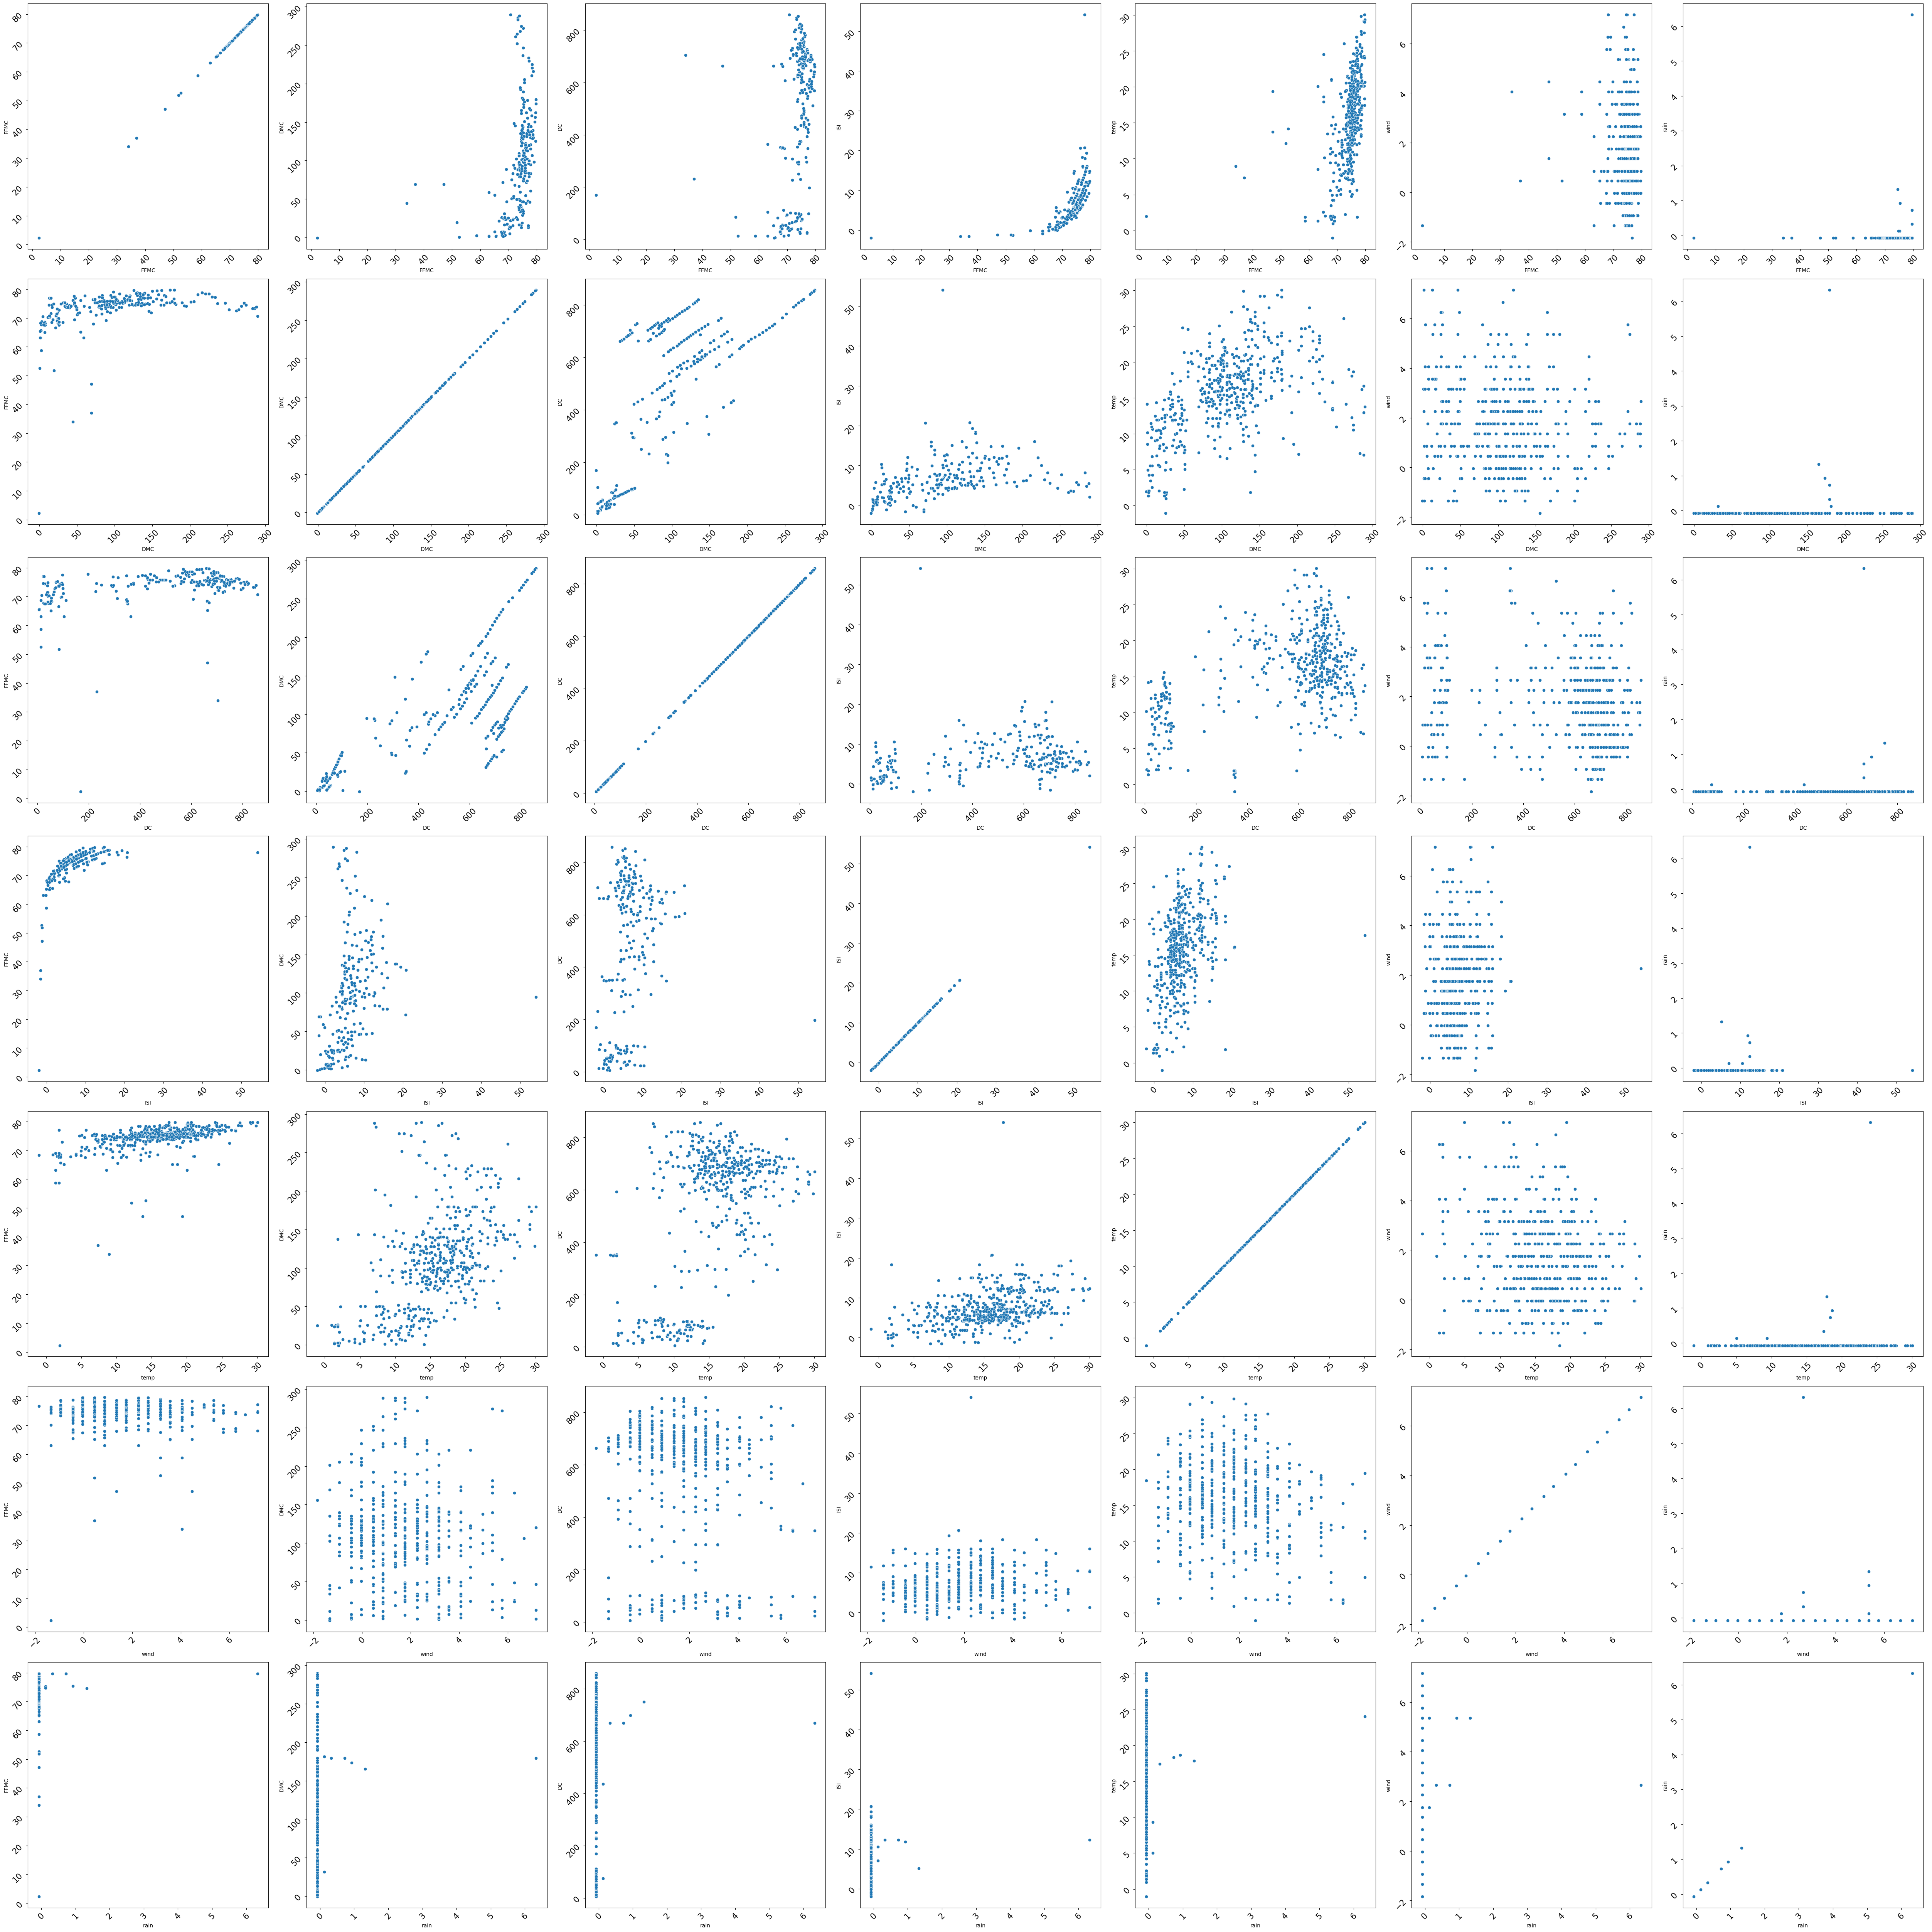

In [109]:

exclude_columns = ['X', 'Y', 'month', 'day', 'RH']
df = df.drop(columns=exclude_columns)
number_of_columns = len(df.columns) - 1 

fig, axs = plt.subplots(ncols=number_of_columns, nrows=number_of_columns, constrained_layout=True)
fig.set_figwidth(50)
fig.set_figheight(50)

for i, column_name_i in enumerate(df.columns[:-1]):
    for j, column_name_j in enumerate(df.columns[:-1]):
        ax = axs[i, j]
        ax.tick_params(labelrotation=45, labelsize=15)
        sns.scatterplot(data=df, x=column_name_i, y=column_name_j, ax=ax)
plt.show()



In [110]:
cov = np.zeros((number_of_columns, number_of_columns))
for i, column_name_i in enumerate(df.columns[:-1]):
    for j, column_name_j in enumerate(df.columns[:-1]):
        cov[i, j] = np.corrcoef(df[column_name_i].to_numpy(), df[column_name_j].to_numpy())[0, 1]


<Axes: >

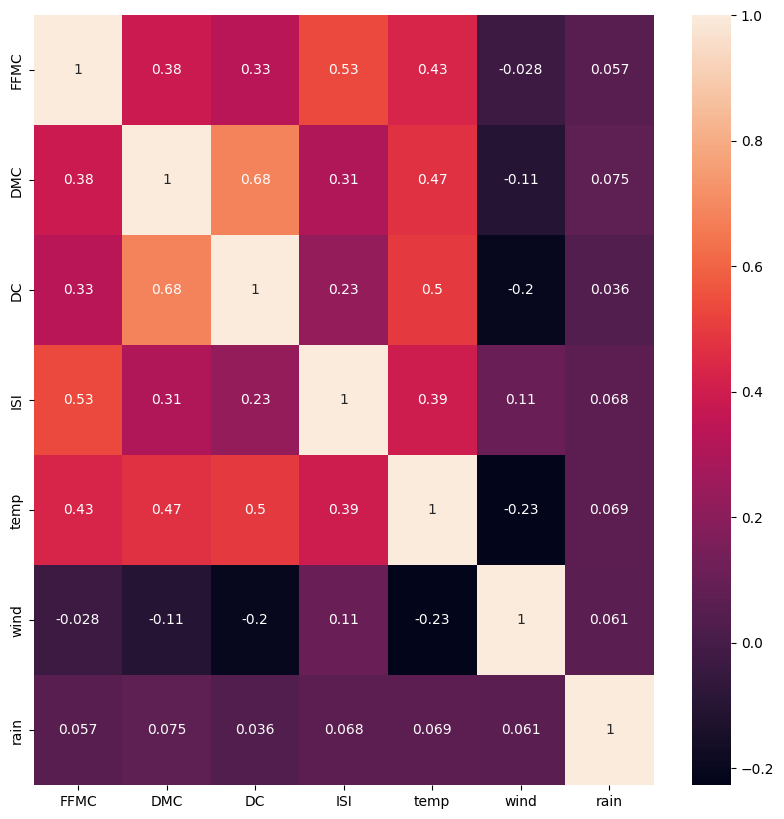

In [111]:
plt.figure(figsize=(10, 10))
sns.heatmap(cov, annot=True, xticklabels=df.columns[:-1], yticklabels=df.columns[:-1])

Do không có cặp thuộc tính nào có độ colinear >= 0.8 nên em không bỏ thuộc tính nào hết.

## Bài 4: Ứng dụng Linear Regression nhờ skikitlearn

In [112]:
import sklearn 

In [113]:
print(X_y.shape)

(517, 13)


In [114]:
X = X_y[:,:-1]
y = X_y[:,-1]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [115]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [116]:
lr.predict(X_test)

array([11.43800272,  7.57498511,  7.42805189,  4.09937264, 12.00118339,
       13.54690948, 13.58621088, 11.36382816, 16.22871846, 15.942302  ,
        5.96514429, 10.12193072, 19.47991164, 12.17662058, 11.8431924 ,
        7.13337661,  9.35911898, 14.00368764,  3.5812945 , 13.52875659,
       14.28140344, 12.97871989,  3.52551525, 14.86265138, 16.33399129,
        9.9432033 , 15.83288434, 10.49789622, 14.97769186,  6.75379157,
        4.71264283,  2.70642665, 11.69737647,  8.42296471, 13.25995806,
       16.58865146,  9.08221462, 16.12657555,  9.41339582,  7.85595132,
       19.20208947, 10.56041814, 19.20208947,  5.91424105,  5.4880879 ,
       13.40920548, 11.30836233,  9.8802552 , 14.6886483 ,  2.0090436 ,
        7.59742301, 14.80500661, 16.28627181, 14.63026551,  7.96647874,
       14.78923774,  9.82380813,  8.09100699, 18.05903411,  3.16839212,
        3.24503214, 11.598448  , 11.3797508 ,  5.82107403, 11.77945456,
        7.39737048,  7.31472007,  9.45143138, 15.42734189,  9.20

In [117]:
lr.theta_


AttributeError: 'LinearRegression' object has no attribute 'theta_'